# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [2]:
xlsx = pd.ExcelFile('European Measurements.xlsx')
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values
print(data)

[[-9.70000000e+00  1.93303385e+03]
 [-9.10000000e+00  3.07678202e+03]
 [-7.70000000e+00  4.61959427e+03]
 [-7.30000000e+00  4.87640388e+03]
 [-7.20000000e+00  5.27621777e+03]
 [-6.20000000e+00  5.76967851e+03]
 [-4.70000000e+00  5.26728526e+03]
 [-4.10000000e+00  6.40777934e+03]
 [-3.30000000e+00  6.05631612e+03]
 [-2.70000000e+00  6.10216500e+03]
 [-2.50000000e+00  5.18359545e+03]
 [-2.30000000e+00  7.03041233e+03]
 [-1.90000000e+00  5.69790109e+03]
 [-1.80000000e+00  5.42920417e+03]
 [-1.20000000e+00  5.23662184e+03]
 [-9.00000000e-01  6.28278124e+03]
 [-1.00000000e-01  6.53285159e+03]
 [ 2.00000000e-01  5.78284515e+03]
 [ 3.00000000e-01  6.57445814e+03]
 [ 4.00000000e-01  5.25761264e+03]
 [ 1.10000000e+00  5.86568880e+03]
 [ 1.50000000e+00  6.92127198e+03]
 [ 1.60000000e+00  6.15982519e+03]
 [ 2.10000000e+00  6.87265063e+03]
 [ 2.20000000e+00  5.57408399e+03]
 [ 2.50000000e+00  5.88485867e+03]
 [ 5.20000000e+00  6.75130936e+03]
 [ 5.40000000e+00  7.32399792e+03]
 [ 5.90000000e+00  7

### Simple GA mechanism

In [49]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0;
        for event in range(len(data)):
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    return pop[sorted_fitness_args[-num_parents:],:]
    # parents = np.empty((num_parents, pop.shape[1]))
    # for parent_num in range(num_parents):
    #     max_fitness_idx = np.where(fitness == np.max(fitness))
    #     max_fitness_idx = max_fitness_idx[0][0]
    #     parents[parent_num, :] = pop[max_fitness_idx, :]
    #     fitness[max_fitness_idx] = -99999999999
    # return parents

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

The population of the first generation: 
[[1517 7797 4673 9105]
 [2033 9313 1572 7473]
 [7501 1085 1223 5191]
 ...
 [5787 6145 3261 9109]
 [2738 6678 8546 8043]
 [7277 1325 9236 5305]]

Evolution:
Generation =  0 	Best fitness =  326483575806.131
Generation =  1 	Best fitness =  326483575806.131
Generation =  2 	Best fitness =  260747440784.6363
Generation =  3 	Best fitness =  252730034530.00568
Generation =  4 	Best fitness =  215109211102.5915
Generation =  5 	Best fitness =  165972670596.74902
Generation =  6 	Best fitness =  122657491519.5449
Generation =  7 	Best fitness =  93777893615.39478
Generation =  8 	Best fitness =  87661015652.69765
Generation =  9 	Best fitness =  75047507370.491
Generation =  10 	Best fitness =  69538295088.96643
Generation =  11 	Best fitness =  43857246847.13698
Generation =  12 	Best fitness =  43857246847.13698
Generation =  13 	Best fitness =  43857246847.13698
Generation =  14 	Best fitness =  38930250815.7164
Generation =  15 	Best fitness =  37

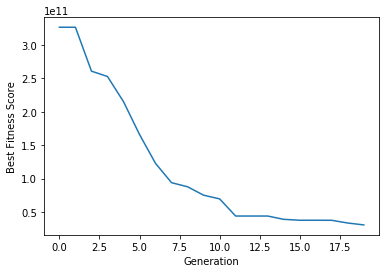

In [4]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Challenge 231
Implement a new and improved GA, based on the one above, by taking the following actions:

1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Consider different GA parameters in order to reach better results

In [50]:
# Reformat running of GA algorithm as function to be able to easily compare

def run_ga(number_of_solutions = 500, number_of_parents = 250,
           number_of_generations = 20, mutation_range=(-100,100), mutation_rate=1):
    # GA Parameters
    formula_degree = 4
    population_size = (number_of_solutions, formula_degree)
    best_outputs = []

    # Genesis
    new_population = np.random.randint(low=0, high=10000, size=population_size)

    # Evolution
    for generation in range(number_of_generations):

        fitness = fitness_function(data, new_population)
        best_outputs.append(round(1/np.max(fitness), 5))
        parents = biased_selection(new_population, fitness, number_of_parents)
        offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
        offspring_mutation = mutation(offspring_recombination)
        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation
    
    # Chart
    plt.plot(best_outputs)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Score")
    plt.show()
    
    # Results
    fitness = fitness_function(data, new_population)
    return (round(1/np.max(fitness), 5))


In [26]:
# 1
def biased_selection(pop, fitness, num_parents):
    fitness = np.array(fitness)
    fitness_probs = fitness / fitness.sum()
    chosen_samples = np.random.choice(np.arange(len(fitness)), num_parents, p=fitness_probs)
    return pop[chosen_samples, :]


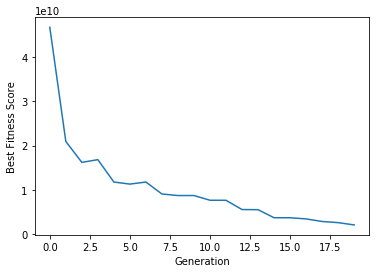

2076850736.79571

In [27]:
run_ga()

In [51]:
# 2
def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        parent_indexes = np.random.choice(np.arange(parents.shape[0]), 2, replace=False)
        parent1_idx = parent_indexes[0]
        parent2_idx = parent_indexes[1]
        recombination_point = np.random.randint(1, parents.shape[1]-1)
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

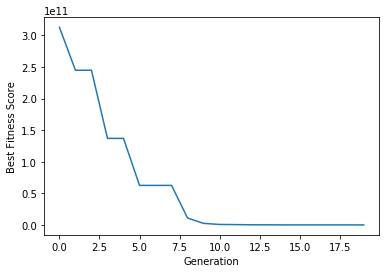

23035571.29696

In [52]:
run_ga()

In [32]:
# 3
def mutation(offspring_recombination, mutation_scale, mutation_rate):
    for idx in range(offspring_recombination.shape[0]):
        low_val, high_val = mutation_scale
        random_value = np.random.randint(low_val, high_val, mutation_rate)
        random_index = np.random.choice(np.arange(offspring_recombination.shape[1]), mutation_rate)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination

In [36]:
# Rewrite run ga to send mutation scale and rate to mutation function

def run_ga(number_of_solutions = 500, number_of_parents = 250,
           number_of_generations = 20, mutation_scale=(-100,100), mutation_rate=1):
    # GA Parameters
    formula_degree = 4
    population_size = (number_of_solutions, formula_degree)
    best_outputs = []

    # Genesis
    new_population = np.random.randint(low=0, high=10000, size=population_size)

    # Evolution
    for generation in range(number_of_generations):

        fitness = fitness_function(data, new_population)
        best_outputs.append(round(1/np.max(fitness), 5))
        parents = biased_selection(new_population, fitness, number_of_parents)
        offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
        offspring_mutation = mutation(offspring_recombination, mutation_scale, mutation_rate)
        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation
        

    # Results
    fitness = fitness_function(data, new_population)
    return (round(1/np.max(fitness), 5))


In [38]:
rates = [1,2,3,4]
scales = [(-100,100), (-50,50), (-20,20), (-10,10), (-5,5), (-1,1)]
best_fitnesses = []

for r in rates:
    for s in scales:
        best_fitnesses.append(run_ga(mutation_scale=s, mutation_rate=r))

best_fitnesses = np.array(best_fitnesses).reshape(len(rates),len(scales))
best_fitness = best_fitnesses.min()
best_indexes = np.where(best_fitnesses == best_fitness)
print(f'value of {best_fitness} acheived with scale of {scales[best_indexes[0][0]]}'
      f' and a rate of {rates[best_indexes[1][0]]}')

value of 9156805.70823 acheived with scale of (-10, 10) and a rate of 2


In [35]:
# 4
# Rewrite run ga to stop when the ratio of last best fit / best fit is under 5%

def run_ga(number_of_solutions = 500, number_of_parents = 250,
           number_of_generations = 20, mutation_scale=(-100,100), mutation_rate=1):
    # GA Parameters
    formula_degree = 4
    population_size = (number_of_solutions, formula_degree)
    best_outputs = []

    # Genesis
    new_population = np.random.randint(low=0, high=10000, size=population_size)

    # Evolution
    for generation in range(number_of_generations):

        fitness = fitness_function(data, new_population)
        best_outputs.append(round(1/np.max(fitness), 5))
        
        if generation > 1 and best_outputs[-2]/best_outputs[-1] < 1.05:
            break
            
        parents = biased_selection(new_population, fitness, number_of_parents)
        offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
        offspring_mutation = mutation(offspring_recombination, mutation_scale, mutation_rate)
        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation
        
    # Chart
    plt.plot(best_outputs)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Score")
    plt.show()


    # Results
    fitness = fitness_function(data, new_population)
    return (round(1/np.max(fitness), 5))


In [46]:
#5 
num_solutions = [250, 500, 750]
num_parents = [50, 150, 250]
num_gens = [10, 20, 30]
best_fitnesses = []

for s in num_solutions:
    for p in num_parents:
        for g in num_gens:
            best_fitnesses.append(run_ga(number_of_solutions = s, number_of_parents = p,
           number_of_generations = g, mutation_scale=(-10, 10), mutation_rate=2))

best_fitnesses = np.array(best_fitnesses).reshape(len(num_solutions),len(num_parents), len(num_gens))
best_fitness = best_fitnesses.min()
best_indexes = np.where(best_fitnesses == best_fitness)
# print(best_fitness)
# print(best_indexes)
print(f'value of {best_fitness} acheived with {num_solutions[best_indexes[0][0]]} solutions'
      f', {num_parents[best_indexes[1][0]]} parents and {num_gens[best_indexes[2][0]]} generations')

value of 83386887.2816 acheived with 750 solutions, 50 parents and 20 generations


## Part 2: Solving Different Problems With the Same GA

Below is a reminder of the K-Means algorithm you implemented in Assignment 21X.

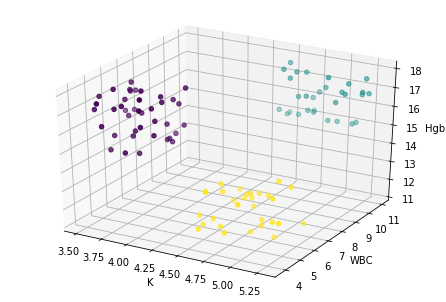

In [6]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

xlsx = pd.ExcelFile('EMR-Blood.xlsx')
sheet1 = xlsx.parse(0)
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

### Challenge 232
Solve the same clustering problem with a GA **without assuming K** (no iteration over differnet Ks), by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

**hint: You can build the population as the cluster assignment of each point or as cluster centers (consider coordinates boundaries)

In [8]:
from sklearn.metrics import calinski_harabasz_score 

def fitness_function(data, pop):
    fitness = []
    for i,solution in enumerate(pop):
        # use calinski harabasz score for fitness, based on bcss wcss ratio
        fitness.append(calinski_harabasz_score(data, solution))
    return fitness


def biased_selection(pop, fitness, num_parents):
    fitness = np.array(fitness)
    fitness_probs = fitness / fitness.sum()
    chosen_samples = np.random.choice(np.arange(len(fitness)), num_parents, p=fitness_probs)
    return pop[chosen_samples, :]


def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        parent_indexes = np.random.choice(np.arange(parents.shape[0]), 2, replace=False)
        parent1_idx = parent_indexes[0]
        parent2_idx = parent_indexes[1]
        recombination_point = np.random.randint(1, parents.shape[1]-1)
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring


def mutation(offspring_recombination, mutation_scale, mutation_rate, max_value):
    for idx in range(offspring_recombination.shape[0]):
        low_val, high_val = mutation_scale
        random_value = np.random.randint(low_val, high_val, mutation_rate)
        random_index = np.random.choice(np.arange(offspring_recombination.shape[1]), mutation_rate)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] % (max_value-1)
    return offspring_recombination


def run_ga(number_of_solutions=1000, number_of_parents=200,
           number_of_generations=1200, mutation_scale=(-1, 1), mutation_rate=2):
    # GA Parameters
    m = EMR3d1.shape[0]
    max_clusters = 9
    population_size = (number_of_solutions, m)
    best_outputs = []

    # Genesis
    new_population = np.random.randint(low=0, high=max_clusters-1, size=population_size)
    print("The population of the first generation: ")
    print(new_population)

    # Evolution
    # Evolution
    print("\nEvolution:")
    for generation in range(number_of_generations):
        fitness = fitness_function(EMR3d1, new_population)
        print("Generation = ", generation, "\tBest fitness = ", round(1 / np.max(fitness), 5))
        # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
        best_outputs.append(round(1 / np.max(fitness), 5))
        parents = biased_selection(new_population, fitness, number_of_parents)
        offspring_recombination = recombination(parents,
                                                offspring_size=(population_size[0] - parents.shape[0], m))
        offspring_mutation = mutation(offspring_recombination, mutation_scale, mutation_rate, max_clusters)
        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation

    # Results
    print("\nThe population of the last generation: ")
    print(new_population)
    fitness = fitness_function(EMR3d1, new_population)
    best_match_idx = np.where(fitness == np.max(fitness))
    best_solution = new_population[best_match_idx, :]
    print("Best solution: ", best_solution)

    # Chart
    plt.plot(best_outputs)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Score")
    plt.show()

    return best_solution

The population of the first generation: 
[[0 5 5 ... 6 1 7]
 [4 5 6 ... 3 4 1]
 [5 2 1 ... 4 3 6]
 ...
 [2 3 7 ... 4 1 0]
 [4 5 7 ... 3 4 4]
 [5 6 5 ... 0 0 1]]

Evolution:
Generation =  0 	Best fitness =  0.34795
Generation =  1 	Best fitness =  0.3526
Generation =  2 	Best fitness =  0.32111
Generation =  3 	Best fitness =  0.25374
Generation =  4 	Best fitness =  0.20114
Generation =  5 	Best fitness =  0.24733
Generation =  6 	Best fitness =  0.20128
Generation =  7 	Best fitness =  0.19165
Generation =  8 	Best fitness =  0.17451
Generation =  9 	Best fitness =  0.17451
Generation =  10 	Best fitness =  0.17252
Generation =  11 	Best fitness =  0.17451
Generation =  12 	Best fitness =  0.17
Generation =  13 	Best fitness =  0.16105
Generation =  14 	Best fitness =  0.15059
Generation =  15 	Best fitness =  0.16521
Generation =  16 	Best fitness =  0.15656
Generation =  17 	Best fitness =  0.15744
Generation =  18 	Best fitness =  0.15626
Generation =  19 	Best fitness =  0.15298
G

Generation =  190 	Best fitness =  0.02793
Generation =  191 	Best fitness =  0.02793
Generation =  192 	Best fitness =  0.03208
Generation =  193 	Best fitness =  0.03481
Generation =  194 	Best fitness =  0.0348
Generation =  195 	Best fitness =  0.03392
Generation =  196 	Best fitness =  0.03154
Generation =  197 	Best fitness =  0.03154
Generation =  198 	Best fitness =  0.03082
Generation =  199 	Best fitness =  0.03339
Generation =  200 	Best fitness =  0.0317
Generation =  201 	Best fitness =  0.02949
Generation =  202 	Best fitness =  0.02894
Generation =  203 	Best fitness =  0.03143
Generation =  204 	Best fitness =  0.03144
Generation =  205 	Best fitness =  0.03257
Generation =  206 	Best fitness =  0.03503
Generation =  207 	Best fitness =  0.02994
Generation =  208 	Best fitness =  0.03495
Generation =  209 	Best fitness =  0.03528
Generation =  210 	Best fitness =  0.03312
Generation =  211 	Best fitness =  0.03398
Generation =  212 	Best fitness =  0.03308
Generation = 

Generation =  381 	Best fitness =  0.01719
Generation =  382 	Best fitness =  0.01614
Generation =  383 	Best fitness =  0.01614
Generation =  384 	Best fitness =  0.01614
Generation =  385 	Best fitness =  0.01371
Generation =  386 	Best fitness =  0.01404
Generation =  387 	Best fitness =  0.01505
Generation =  388 	Best fitness =  0.01674
Generation =  389 	Best fitness =  0.01459
Generation =  390 	Best fitness =  0.01551
Generation =  391 	Best fitness =  0.01518
Generation =  392 	Best fitness =  0.01539
Generation =  393 	Best fitness =  0.01501
Generation =  394 	Best fitness =  0.01506
Generation =  395 	Best fitness =  0.01405
Generation =  396 	Best fitness =  0.01366
Generation =  397 	Best fitness =  0.01308
Generation =  398 	Best fitness =  0.01284
Generation =  399 	Best fitness =  0.01284
Generation =  400 	Best fitness =  0.01554
Generation =  401 	Best fitness =  0.01415
Generation =  402 	Best fitness =  0.01484
Generation =  403 	Best fitness =  0.01505
Generation 

Generation =  573 	Best fitness =  0.01278
Generation =  574 	Best fitness =  0.01246
Generation =  575 	Best fitness =  0.01211
Generation =  576 	Best fitness =  0.01274
Generation =  577 	Best fitness =  0.01239
Generation =  578 	Best fitness =  0.0125
Generation =  579 	Best fitness =  0.01106
Generation =  580 	Best fitness =  0.01239
Generation =  581 	Best fitness =  0.01274
Generation =  582 	Best fitness =  0.01274
Generation =  583 	Best fitness =  0.01303
Generation =  584 	Best fitness =  0.01295
Generation =  585 	Best fitness =  0.01288
Generation =  586 	Best fitness =  0.01295
Generation =  587 	Best fitness =  0.01288
Generation =  588 	Best fitness =  0.01295
Generation =  589 	Best fitness =  0.01159
Generation =  590 	Best fitness =  0.01325
Generation =  591 	Best fitness =  0.01325
Generation =  592 	Best fitness =  0.01308
Generation =  593 	Best fitness =  0.01249
Generation =  594 	Best fitness =  0.01249
Generation =  595 	Best fitness =  0.01284
Generation =

Generation =  764 	Best fitness =  0.01214
Generation =  765 	Best fitness =  0.01214
Generation =  766 	Best fitness =  0.0131
Generation =  767 	Best fitness =  0.01188
Generation =  768 	Best fitness =  0.01279
Generation =  769 	Best fitness =  0.01338
Generation =  770 	Best fitness =  0.01248
Generation =  771 	Best fitness =  0.01346
Generation =  772 	Best fitness =  0.01332
Generation =  773 	Best fitness =  0.01418
Generation =  774 	Best fitness =  0.01418
Generation =  775 	Best fitness =  0.01292
Generation =  776 	Best fitness =  0.01279
Generation =  777 	Best fitness =  0.01279
Generation =  778 	Best fitness =  0.01424
Generation =  779 	Best fitness =  0.01413
Generation =  780 	Best fitness =  0.01439
Generation =  781 	Best fitness =  0.01373
Generation =  782 	Best fitness =  0.01577
Generation =  783 	Best fitness =  0.01318
Generation =  784 	Best fitness =  0.01255
Generation =  785 	Best fitness =  0.0139
Generation =  786 	Best fitness =  0.01309
Generation = 

Generation =  956 	Best fitness =  0.01671
Generation =  957 	Best fitness =  0.01671
Generation =  958 	Best fitness =  0.01707
Generation =  959 	Best fitness =  0.01794
Generation =  960 	Best fitness =  0.01853
Generation =  961 	Best fitness =  0.01853
Generation =  962 	Best fitness =  0.01723
Generation =  963 	Best fitness =  0.0163
Generation =  964 	Best fitness =  0.01669
Generation =  965 	Best fitness =  0.01669
Generation =  966 	Best fitness =  0.01669
Generation =  967 	Best fitness =  0.01788
Generation =  968 	Best fitness =  0.01774
Generation =  969 	Best fitness =  0.01751
Generation =  970 	Best fitness =  0.01788
Generation =  971 	Best fitness =  0.01648
Generation =  972 	Best fitness =  0.01788
Generation =  973 	Best fitness =  0.01697
Generation =  974 	Best fitness =  0.01942
Generation =  975 	Best fitness =  0.01942
Generation =  976 	Best fitness =  0.01874
Generation =  977 	Best fitness =  0.02091
Generation =  978 	Best fitness =  0.01979
Generation =

Generation =  1144 	Best fitness =  0.0121
Generation =  1145 	Best fitness =  0.0121
Generation =  1146 	Best fitness =  0.0121
Generation =  1147 	Best fitness =  0.0121
Generation =  1148 	Best fitness =  0.01256
Generation =  1149 	Best fitness =  0.01256
Generation =  1150 	Best fitness =  0.01246
Generation =  1151 	Best fitness =  0.01374
Generation =  1152 	Best fitness =  0.01374
Generation =  1153 	Best fitness =  0.01336
Generation =  1154 	Best fitness =  0.01304
Generation =  1155 	Best fitness =  0.01295
Generation =  1156 	Best fitness =  0.01441
Generation =  1157 	Best fitness =  0.01423
Generation =  1158 	Best fitness =  0.01339
Generation =  1159 	Best fitness =  0.01445
Generation =  1160 	Best fitness =  0.01245
Generation =  1161 	Best fitness =  0.01399
Generation =  1162 	Best fitness =  0.01287
Generation =  1163 	Best fitness =  0.01399
Generation =  1164 	Best fitness =  0.0139
Generation =  1165 	Best fitness =  0.01448
Generation =  1166 	Best fitness =  0

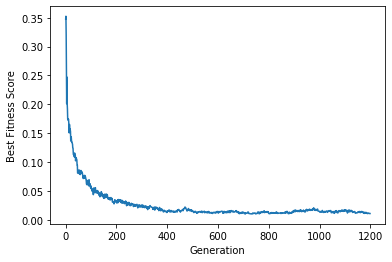

In [9]:
best_solution = run_ga()

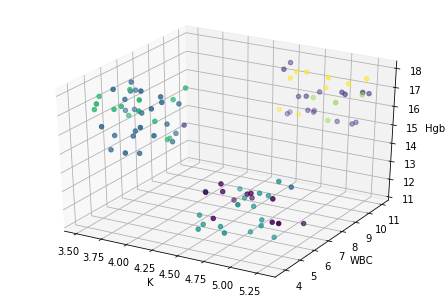

In [12]:
make_chart(EMR3d1, best_solution.squeeze(), variables1)

### Conclusion
* The genetic algorithm was implemented in order to find the optimal clustering formation for the data points from the EMR blood dataset.
* As a fitness function the `Calinski-Harabasz Index` was used in order to determine how well the data is clustered.
* The algorithm was used with the following hyperparameters:
    `number_of_solutions=1000, number_of_parents=200, number_of_generations=1200, mutation_scale=(-1, 1), mutation_rate=2, maximum_cluster_number=9`
* When observing the graph above, we can see that the loss (inverse of the fitness score) is decreasing from an initial value of 0.34795 to a final value of 0.01097, with a long tail in the later part of the iterations.
* This indicates that the algorithm indeed manages to improve the `Calinski-Harabasz Index`.
* When plotting the assigned clusters, we see that the clustering result is not optimal, there are 7 clusters instead of 3.
* A possible explanation for the poor results is that the algorithm converges to a local minimum.
* Possible solutions are to further tune the hyperparameters or to use different fitness functions.


## Challenge 233: Reconstruct Image (Bonus)
In this part you will attemp to generate an image which is closest to a target image given. 

First we will load the image from a file:


In [0]:
import matplotlib.image as mpimg

img=mpimg.imread('pexels-photo-57905.jpeg')

For simplicity (and running time), we focus on a small part of the image:

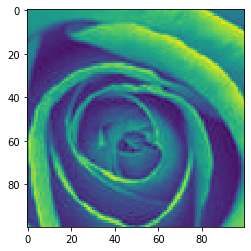

In [64]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img[100:200,200:300,0])

And we will define this part as out target image to reconstruct:

In [0]:
target = img[100:200,200:300,0]

Your mission is to generate an image starting at random noise. The goal is to get an image as close as possible to the target. Don;t worry if it's still noisy...
FYI: GA are not the best solution for these types of problems ;)
You can use these blog posts to give you ideas:
https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

https://heartbeat.fritz.ai/reproducing-images-using-a-genetic-algorithm-with-python-91fc701ff84

<ipython-input-1-a7cdd5c25285>:36: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  s = [-structural_similarity(data, pop[i]) for i in range(len(pop))]


Generation =  10000 	Best fitness =  -0.31376
Generation =  20000 	Best fitness =  -0.3649
Generation =  30000 	Best fitness =  -0.39177
Generation =  40000 	Best fitness =  -0.41145
Generation =  50000 	Best fitness =  -0.4266
Generation =  60000 	Best fitness =  -0.43729
Generation =  70000 	Best fitness =  -0.44586
Generation =  80000 	Best fitness =  -0.45562
Generation =  90000 	Best fitness =  -0.46223
Generation =  100000 	Best fitness =  -0.46929
Generation =  110000 	Best fitness =  -0.4755
Generation =  120000 	Best fitness =  -0.48136
Generation =  130000 	Best fitness =  -0.48629
Generation =  140000 	Best fitness =  -0.49176
Generation =  150000 	Best fitness =  -0.4951
Generation =  160000 	Best fitness =  -0.49877
Generation =  170000 	Best fitness =  -0.50355
Generation =  180000 	Best fitness =  -0.50738
Generation =  190000 	Best fitness =  -0.51064
Generation =  200000 	Best fitness =  -0.51521
Generation =  210000 	Best fitness =  -0.51842
Generation =  220000 	Best

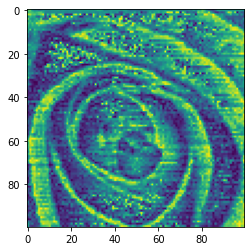

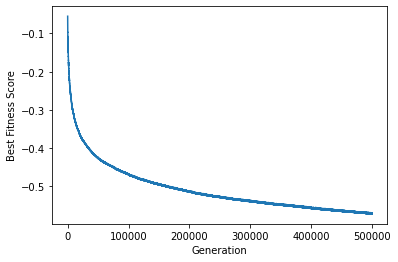

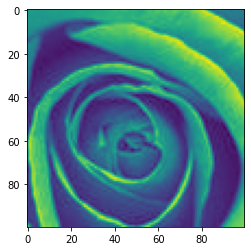

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
from skimage.metrics import structural_similarity
from sklearn.metrics import calinski_harabasz_score
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

import_path = '/pexels-photo-57905.jpeg'


img = mpimg.imread(import_path)


target = img[100:200, 200:300, 0]
target = target.flatten()


def fitness_function(data, pop):

    s = [-structural_similarity(data, pop[i]) for i in range(len(pop))]

    return s



def biased_selection(population, fitness, n_parents):

    idx = np.argsort(fitness)[:n_parents]
    return population[idx,:]


def recombination(parents, n_solutions, n_parents):

    offspring_size = (n_solutions - n_parents, parents.shape[1])
    offspring = np.empty(offspring_size)

    recombination_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring



def mutation(offspring, mutation_rate, mutation_scale):

    for idx in range(offspring.shape[0]):
        mask = np.random.binomial(1, mutation_rate, offspring.shape[1]).astype(bool)
        random_values = np.random.randint(0, mutation_scale, mask.sum())
        offspring[idx, mask] = random_values

    return offspring


# GA Parameters

mutation_rate = 0.001
mutation_scale = 250
number_of_solutions = 8
number_of_parents = 4
number_of_generations = 500000
best_outputs = []


max_value, min_value = target.min(), target.max()

# new_population = np.random.randint(low=target.min(), high=target.max(), size=population_size)
new_population = np.random.normal(125, 20, (number_of_solutions, target.size))
population_size = new_population.size

for generation in range(number_of_generations):

    fitness = fitness_function(target, new_population)
    best_solution = round(np.max(fitness), 5)
    if generation % 10000 == 0 and generation!=0:
        print("Generation = ", generation, "\tBest fitness = ", best_solution)
    best_outputs.append(best_solution)
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents,number_of_solutions,number_of_parents)
    offspring_mutation = mutation(offspring_recombination, mutation_rate, mutation_scale)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(target, new_population)
best_match_idx = np.where(fitness == np.max(fitness))[0][0]
optimal_solution = new_population[best_match_idx, :]
print("Best solution: ", optimal_solution)

# Chart
plt.imshow(optimal_solution.reshape(100, 100))
plt.show()
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

# make_chart(target, optimal_solution, variables1)
plt.imshow(target.reshape(100,100))
plt.show()